In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.base import clone
plt.style.use('ggplot')
pd.set_option("display.max_columns", 50)

%matplotlib inline

In [2]:
#Lectura del dataset
# se lee la data procesada en la seleccion de caracteristicas (68 caracteristicas priorizadas con MDI-RandomForest )
df =  pd.read_csv(
    'data/03_campos_priorizados/MI_priorizados.csv', 
    header=0, 
    sep=","
)

In [3]:
df.shape

(1700, 67)

In [4]:
df.head()

,AGE,L_BLOOD,ROE,ALT_BLOOD,AST_BLOOD,S_AD_ORIT,n_r_ecg_p_05,TIME_B_S,NA_R_1_n,nr_03,D_AD_ORIT,lat_im,DLIT_AG,STENOK_AN,ant_im,IBS_POST,inf_im,n_r_ecg_p_01,INF_ANAM,ANT_CA_S_n,zab_leg_02,post_im,n_p_ecg_p_12,SEX,SVT_POST,...,n_r_ecg_p_03,ritm_ecg_p_07,n_r_ecg_p_04,nr_07,B_BLOK_S_n,O_L_POST,n_p_ecg_p_10,GEPAR_S_n,n_p_ecg_p_06,fibr_ter_03,zab_leg_03,n_p_ecg_p_07,zab_leg_06,ritm_ecg_p_02,n_r_ecg_p_02,SIM_GIPERT,zab_leg_04,zab_leg_01,ritm_ecg_p_04,fibr_ter_06,endocr_03,n_r_ecg_p_06,nr_04,n_p_ecg_p_09,FIB_G_POST
0,77.0,8.000000,16.00000,0.15,0.15,180,1.0,4.0,0.0,0.0,100,0.0,7.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,7.800000,3.00000,0.38,0.18,120,0.0,2.0,0.0,0.0,90,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,10.800000,13.44489,0.30,0.11,180,0.0,3.0,1.0,0.0,100,1.0,2.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,8.782914,13.44489,0.75,0.37,120,0.0,2.0,0.0,0.0,70,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,8.300000,13.44489,0.45,0.22,160,0.0,9.0,0.0,0.0,90,1.0,7.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_analyzed = df.copy()

In [6]:
# Analizando la Edad de la esposa
df_analyzed['AGE'].describe()

count    1700.000000
mean       61.856974
std        11.233395
min        26.000000
25%        54.000000
50%        63.000000
75%        70.000000
max        92.000000
Name: AGE, dtype: float64

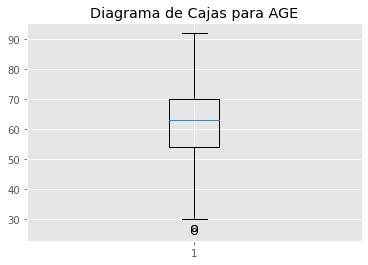

AxesSubplot(0.125,0.125;0.775x0.755)


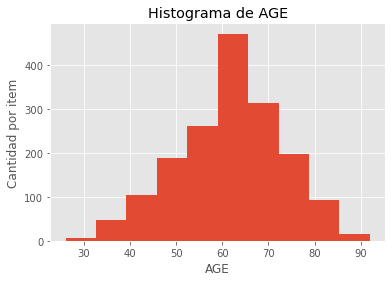

In [7]:
x0=df['AGE']
by_zsn_a = df.sort_values('AGE',ascending=True)
x0 = by_zsn_a ['AGE']
plt.boxplot(x0)
plt.title("Diagrama de Cajas para AGE")
plt.show()

df0 = df['AGE']
histogram0 = df0.plot.hist()
print(histogram0)
plt.title('Histograma de AGE')
plt.xlabel('AGE')
plt.ylabel('Cantidad por item')
plt.show()

In [8]:
# Analizando la Edad de la esposa
df_analyzed['L_BLOOD'].describe()

count    1700.000000
mean        8.782914
std         3.273073
min         2.000000
25%         6.600000
50%         8.400000
75%        10.200000
max        27.900000
Name: L_BLOOD, dtype: float64

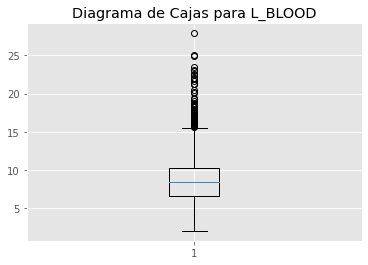

AxesSubplot(0.125,0.125;0.775x0.755)


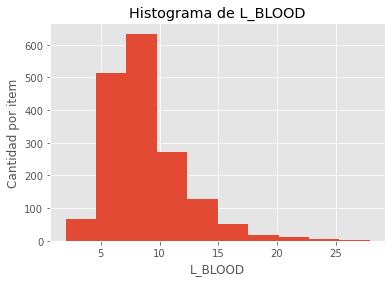

In [9]:
x1=df['L_BLOOD']
by_edad = df.sort_values('L_BLOOD',ascending=True)
x1 = by_edad ['L_BLOOD']
plt.boxplot(x1)
plt.title("Diagrama de Cajas para L_BLOOD")
plt.show()

df1 = df['L_BLOOD']
histogram = df1.plot.hist()
print(histogram)
plt.title('Histograma de L_BLOOD')
plt.xlabel('L_BLOOD')
plt.ylabel('Cantidad por item')
plt.show()

In [10]:
# Analizando ROE
df_analyzed['ROE'].describe()

count    1700.000000
mean       13.444890
std        10.600002
min         1.000000
25%         6.000000
50%        11.000000
75%        17.000000
max       140.000000
Name: ROE, dtype: float64

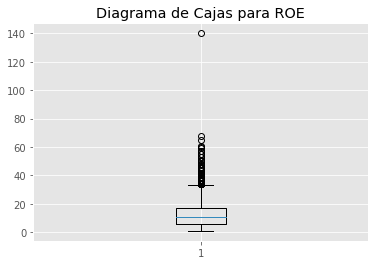

AxesSubplot(0.125,0.125;0.775x0.755)


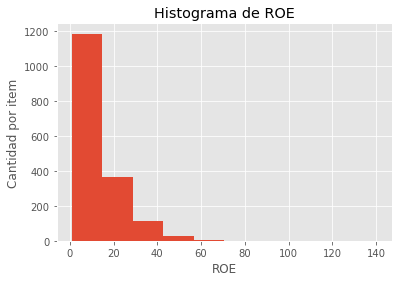

In [11]:
x2=df['ROE']
by_l_blood = df.sort_values('ROE',ascending=True)
x2 = by_l_blood ['ROE']
plt.boxplot(x2)
plt.title("Diagrama de Cajas para ROE")
plt.show()

df2 = df['ROE']
histogram2 = df2.plot.hist()
print(histogram2)
plt.title('Histograma de ROE')
plt.xlabel('ROE')
plt.ylabel('Cantidad por item')
plt.show()

In [12]:
# Analizando ALT_BLOOD
df_analyzed['ALT_BLOOD'].describe()

count    1700.000000
mean        0.426082
std         0.374431
min         0.030000
25%         0.150000
50%         0.300000
75%         0.520000
max         3.000000
Name: ALT_BLOOD, dtype: float64

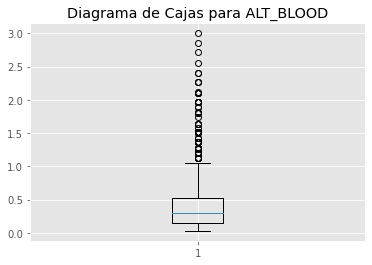

AxesSubplot(0.125,0.125;0.775x0.755)


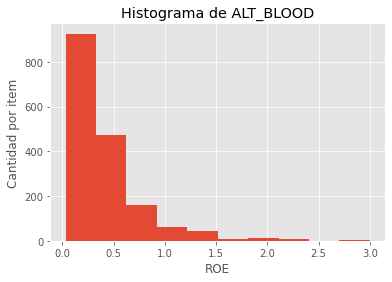

In [13]:
x3=df['ALT_BLOOD']
by_roe = df.sort_values('ALT_BLOOD',ascending=True)
x3 = by_roe ['ALT_BLOOD']
plt.boxplot(x3)
plt.title("Diagrama de Cajas para ALT_BLOOD")
plt.show()

df3 = df['ALT_BLOOD']
histogram3 = df3.plot.hist()
print(histogram3)
plt.title('Histograma de ALT_BLOOD')
plt.xlabel('ROE')
plt.ylabel('Cantidad por item')
plt.show()

In [14]:
# Analizando AST_BLOOD
df_analyzed['AST_BLOOD'].describe()

count    1700.000000
mean        0.244653
std         0.188940
min         0.040000
25%         0.150000
50%         0.180000
75%         0.300000
max         2.150000
Name: AST_BLOOD, dtype: float64

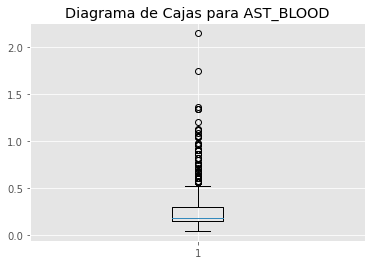

AxesSubplot(0.125,0.125;0.775x0.755)


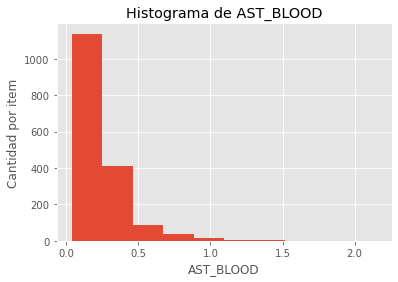

In [15]:
x4=df['AST_BLOOD']
by_k_blood = df.sort_values('AST_BLOOD',ascending=True)
x4 = by_k_blood ['AST_BLOOD']
plt.boxplot(x4)
plt.title("Diagrama de Cajas para AST_BLOOD")
plt.show()

df4 = df['AST_BLOOD']
histogram4 = df4.plot.hist()
print(histogram4)
plt.title('Histograma de AST_BLOOD')
plt.xlabel('AST_BLOOD')
plt.ylabel('Cantidad por item')
plt.show()

In [16]:
# Analizando S_AD_ORIT
df_analyzed['S_AD_ORIT'].describe()

count    1700.000000
mean      133.867647
std        28.828359
min         0.000000
25%       120.000000
50%       130.000000
75%       150.000000
max       260.000000
Name: S_AD_ORIT, dtype: float64

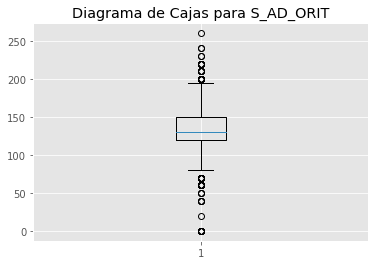

AxesSubplot(0.125,0.125;0.775x0.755)


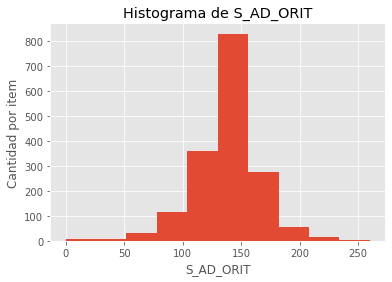

In [17]:
x5=df['S_AD_ORIT']
by_ast_blood = df.sort_values('S_AD_ORIT',ascending=True)
x5 = by_ast_blood ['S_AD_ORIT']
plt.boxplot(x5)
plt.title("Diagrama de Cajas para S_AD_ORIT")
plt.show()

df5 = df['S_AD_ORIT']
histogram5 = df5.plot.hist()
print(histogram5)
plt.title('Histograma de S_AD_ORIT')
plt.xlabel('S_AD_ORIT')
plt.ylabel('Cantidad por item')
plt.show()

In [18]:
# Analizando n_r_ecg_p_05
df_analyzed['n_r_ecg_p_05'].describe()

count    1700.000000
mean        0.044164
std         0.198447
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: n_r_ecg_p_05, dtype: float64

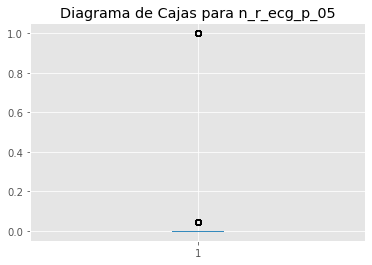

AxesSubplot(0.125,0.125;0.775x0.755)


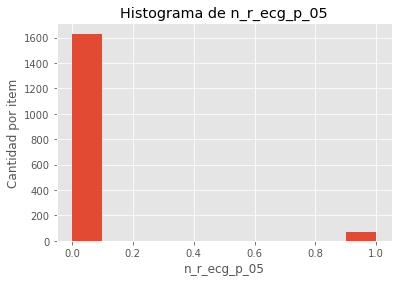

In [19]:
x6=df['n_r_ecg_p_05']
by_s_ad_orit = df.sort_values('n_r_ecg_p_05',ascending=True)
x6 = by_s_ad_orit ['n_r_ecg_p_05']
plt.boxplot(x6)
plt.title("Diagrama de Cajas para n_r_ecg_p_05")
plt.show()

df6 = df['n_r_ecg_p_05']
histogram6 = df6.plot.hist()
print(histogram6)
plt.title('Histograma de n_r_ecg_p_05')
plt.xlabel('n_r_ecg_p_05')
plt.ylabel('Cantidad por item')
plt.show()

In [20]:
# Analizando TIME_B_S
df_analyzed['TIME_B_S'].describe()

count    1700.000000
mean        4.684244
std         2.762533
min         1.000000
25%         2.000000
50%         4.684244
75%         7.000000
max         9.000000
Name: TIME_B_S, dtype: float64

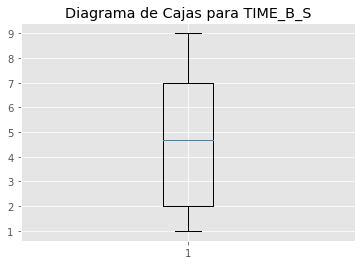

AxesSubplot(0.125,0.125;0.775x0.755)


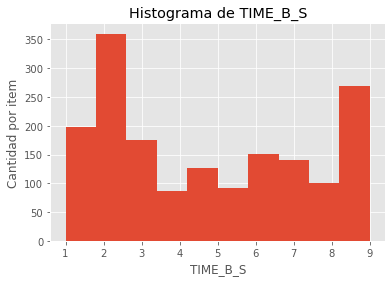

In [21]:
x7=df['TIME_B_S']
by_alt_blood = df.sort_values('TIME_B_S',ascending=True)
x7 = by_alt_blood ['TIME_B_S']
plt.boxplot(x7)
plt.title("Diagrama de Cajas para TIME_B_S")
plt.show()

df7 = df['TIME_B_S']

histogram7 = df7.plot.hist()
print(histogram7)
plt.title('Histograma de TIME_B_S')
plt.xlabel('TIME_B_S')
plt.ylabel('Cantidad por item')
plt.show()

In [22]:
# Analizando NA_R_1_n
df_analyzed['NA_R_1_n'].describe()

count    1700.000000
mean        0.484956
std         0.778374
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: NA_R_1_n, dtype: float64

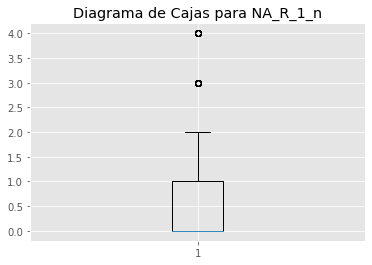

AxesSubplot(0.125,0.125;0.775x0.755)


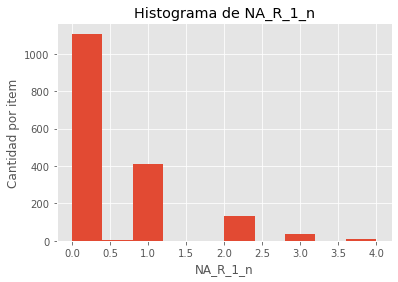

In [23]:
x8=df['NA_R_1_n']
by_na_blood = df.sort_values('NA_R_1_n',ascending=True)
x8 = by_na_blood ['NA_R_1_n']
plt.boxplot(x8)
plt.title("Diagrama de Cajas para NA_R_1_n")
plt.show()

df8 = df['NA_R_1_n']

histogram8 = df8.plot.hist()
print(histogram8)
plt.title('Histograma de NA_R_1_n')
plt.xlabel('NA_R_1_n')
plt.ylabel('Cantidad por item')
plt.show()

In [24]:
# Analizando nr_03
df_analyzed['nr_03'].describe()

count    1700.000000
mean        0.020846
std         0.142024
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: nr_03, dtype: float64

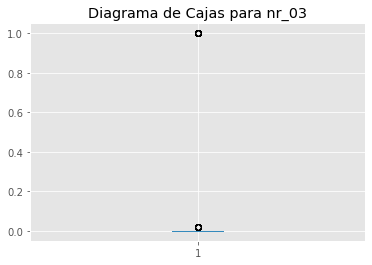

AxesSubplot(0.125,0.125;0.775x0.755)


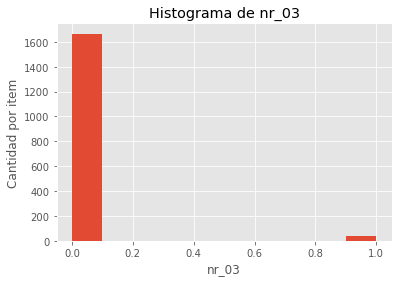

In [25]:
x9=df['nr_03']
by_time_b_s = df.sort_values('nr_03',ascending=True)
x9 = by_time_b_s ['nr_03']
plt.boxplot(x9)
plt.title("Diagrama de Cajas para nr_03")
plt.show()

df9 = df['nr_03']

histogram9 = df9.plot.hist()
print(histogram9)
plt.title('Histograma de nr_03')
plt.xlabel('nr_03')
plt.ylabel('Cantidad por item')
plt.show()

In [26]:
# Analizando D_AD_ORIT
df_analyzed['D_AD_ORIT'].describe()

count    1700.000000
mean       82.317647
std        16.849723
min         0.000000
25%        80.000000
50%        80.000000
75%        90.000000
max       190.000000
Name: D_AD_ORIT, dtype: float64

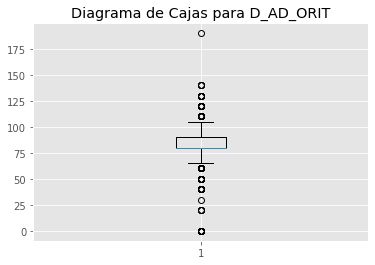

AxesSubplot(0.125,0.125;0.775x0.755)


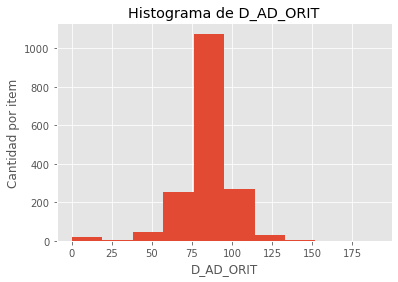

In [27]:
x10=df['D_AD_ORIT']
by_d_ad_orit = df.sort_values('D_AD_ORIT',ascending=True)
x10 = by_d_ad_orit ['D_AD_ORIT']
plt.boxplot(x10)
plt.title("Diagrama de Cajas para D_AD_ORIT")
plt.show()

df10 = df['D_AD_ORIT']
histogram10 = df10.plot.hist()
print(histogram10)
plt.title('Histograma de D_AD_ORIT')
plt.xlabel('D_AD_ORIT')
plt.ylabel('Cantidad por item')
plt.show()

In [28]:
# Analizando lat_im
df_analyzed['lat_im'].describe()

count    1700.000000
mean        0.861728
std         0.862203
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: lat_im, dtype: float64

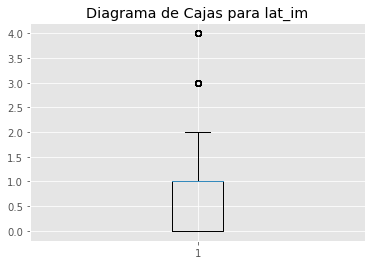

AxesSubplot(0.125,0.125;0.775x0.755)


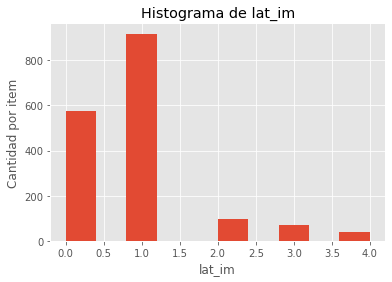

In [29]:
x11=df['lat_im']
by_lat_im = df.sort_values('lat_im',ascending=True)
x11 = by_lat_im ['lat_im']
plt.boxplot(x11)
plt.title("Diagrama de Cajas para lat_im")
plt.show()

df11 = df['lat_im']
histogram11 = df11.plot.hist()
print(histogram11)
plt.title('Histograma de lat_im')
plt.xlabel('lat_im')
plt.ylabel('Cantidad por item')
plt.show()

In [30]:
# Analizando DLIT_AG
df_analyzed['DLIT_AG'].describe()

count    1700.000000
mean        3.340220
std         2.863578
min         0.000000
25%         0.000000
50%         3.340220
75%         7.000000
max         7.000000
Name: DLIT_AG, dtype: float64

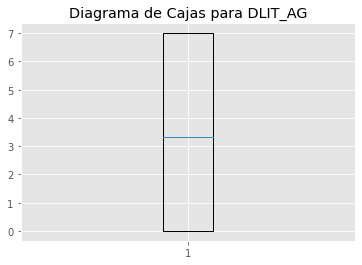

AxesSubplot(0.125,0.125;0.775x0.755)


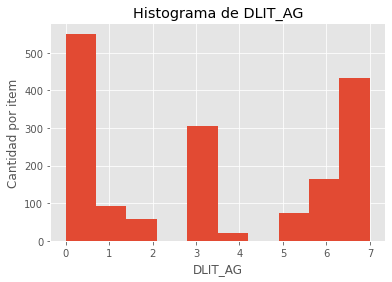

In [31]:
x12=df['DLIT_AG']
by_s_ad_kbrig = df.sort_values('DLIT_AG',ascending=True)
x12 = by_s_ad_kbrig ['DLIT_AG']
plt.boxplot(x12)
plt.title("Diagrama de Cajas para DLIT_AG")
plt.show()

df12 = df['DLIT_AG']
histogram12 = df12.plot.hist()
print(histogram12)
plt.title('Histograma de DLIT_AG')
plt.xlabel('DLIT_AG')
plt.ylabel('Cantidad por item')
plt.show()

In [32]:
# Analizando STENOK_AN
df_analyzed['STENOK_AN'].describe()

count    1700.000000
mean        2.316186
std         2.363227
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max         6.000000
Name: STENOK_AN, dtype: float64

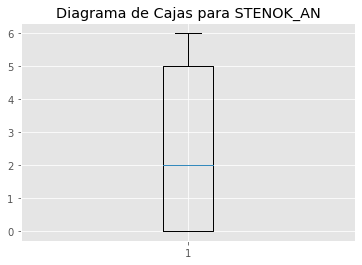

AxesSubplot(0.125,0.125;0.775x0.755)


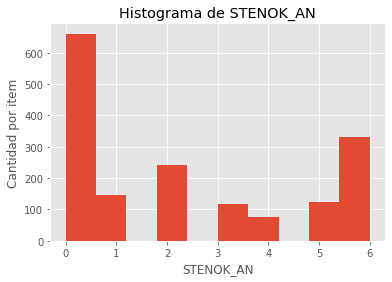

In [33]:
x13=df['STENOK_AN']
by_na_r_2_n = df.sort_values('STENOK_AN',ascending=True)
x13 = by_na_r_2_n ['STENOK_AN']
plt.boxplot(x13)
plt.title("Diagrama de Cajas para STENOK_AN")
plt.show()

df13 = df['STENOK_AN']
histogram13 = df13.plot.hist()
print(histogram13)
plt.title('Histograma de STENOK_AN')
plt.xlabel('STENOK_AN')
plt.ylabel('Cantidad por item')
plt.show()

In [34]:
# Analizando ant_im
df_analyzed['ant_im'].describe()

count    1700.000000
mean        1.570810
std         1.669612
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max         4.000000
Name: ant_im, dtype: float64

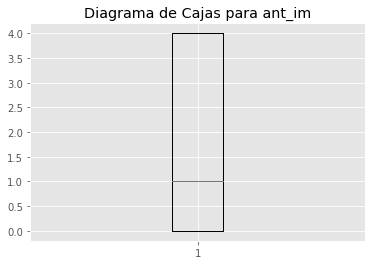

AxesSubplot(0.125,0.125;0.775x0.755)


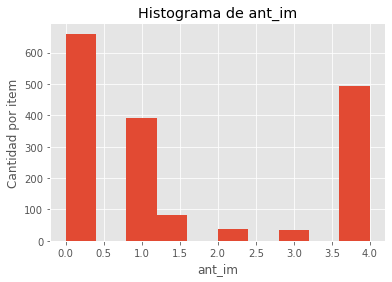

In [35]:
x14=df['ant_im']
by_dlit_ag = df.sort_values('ant_im',ascending=True)
x14 = by_dlit_ag ['ant_im']
plt.boxplot(x14)
plt.title("Diagrama de Cajas para ant_im")
plt.show()

df14 = df['ant_im']
histogram14 = df14.plot.hist()
print(histogram14)
plt.title('Histograma de ant_im')
plt.xlabel('ant_im')
plt.ylabel('Cantidad por item')
plt.show()

In [36]:
# Analizando IBS_POST
df_analyzed['IBS_POST'].describe()

count    1700.000000
mean        1.160703
std         0.789280
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: IBS_POST, dtype: float64

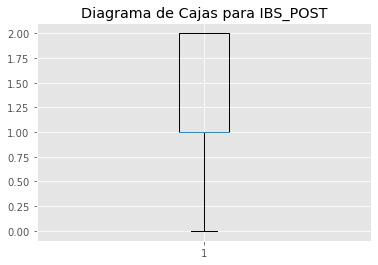

AxesSubplot(0.125,0.125;0.775x0.755)


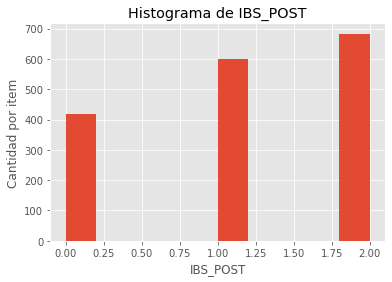

In [37]:
x15=df['IBS_POST']
by_stenok_an = df.sort_values('IBS_POST',ascending=True)
x15 = by_stenok_an ['IBS_POST']
plt.boxplot(x15)
plt.title("Diagrama de Cajas para IBS_POST")
plt.show()

df15 = df['IBS_POST']
histogram15 = df15.plot.hist()
print(histogram15)
plt.title('Histograma de IBS_POST')
plt.xlabel('IBS_POST')
plt.ylabel('Cantidad por item')
plt.show()

In [38]:
# Analizando inf_im
df_analyzed['inf_im'].describe()

count    1700.000000
mean        1.014815
std         1.371458
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         4.000000
Name: inf_im, dtype: float64

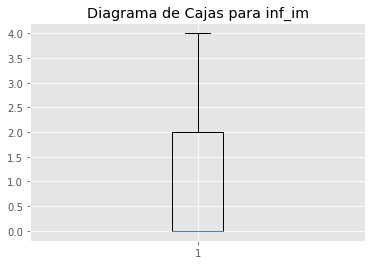

AxesSubplot(0.125,0.125;0.775x0.755)


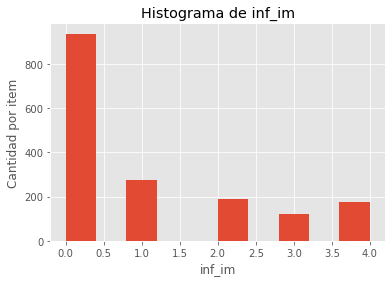

In [39]:
x16=df['inf_im']
by_ant_im = df.sort_values('inf_im',ascending=True)
x16 = by_ant_im ['inf_im']
plt.boxplot(x16)
plt.title("Diagrama de Cajas para inf_im")
plt.show()

df16 = df['inf_im']
histogram16 = df16.plot.hist()
print(histogram16)
plt.title('Histograma de inf_im')
plt.xlabel('inf_im')
plt.ylabel('Cantidad por item')
plt.show()

In [40]:
# Analizando n_r_ecg_p_01
df_analyzed['n_r_ecg_p_01'].describe()

count    1700.000000
mean        0.036593
std         0.181352
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: n_r_ecg_p_01, dtype: float64

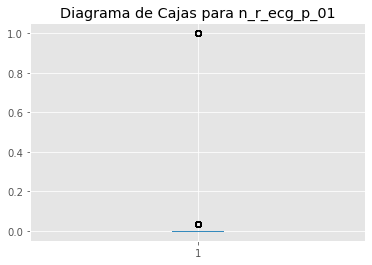

AxesSubplot(0.125,0.125;0.775x0.755)


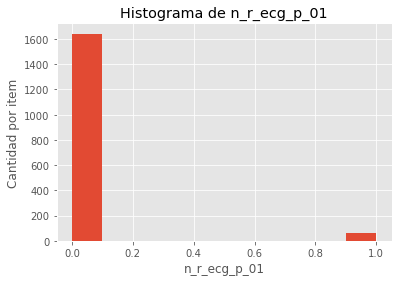

In [41]:
x17=df['n_r_ecg_p_01']
by_not_na = df.sort_values('n_r_ecg_p_01',ascending=True)
x17 = by_not_na ['n_r_ecg_p_01']
plt.boxplot(x17)
plt.title("Diagrama de Cajas para n_r_ecg_p_01")
plt.show()

df17 = df['n_r_ecg_p_01']
histogram17 = df17.plot.hist()
print(histogram17)
plt.title('Histograma de n_r_ecg_p_01')
plt.xlabel('n_r_ecg_p_01')
plt.ylabel('Cantidad por item')
plt.show()

In [42]:
# Analizando INF_ANAM
df_analyzed['INF_ANAM'].describe()

count    1700.000000
mean        0.554835
std         0.835816
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: INF_ANAM, dtype: float64

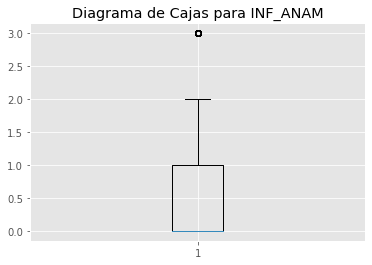

AxesSubplot(0.125,0.125;0.775x0.755)


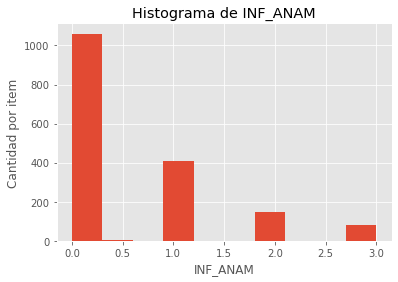

In [43]:
x18=df['INF_ANAM']
by_inf_im = df.sort_values('INF_ANAM',ascending=True)
x18 = by_inf_im ['INF_ANAM']
plt.boxplot(x18)
plt.title("Diagrama de Cajas para INF_ANAM")
plt.show()

df18 = df['INF_ANAM']
histogram18 = df18.plot.hist()
print(histogram18)
plt.title('Histograma de INF_ANAM')
plt.xlabel('INF_ANAM')
plt.ylabel('Cantidad por item')
plt.show()

In [44]:
# Analizando ANT_CA_S_n
df_analyzed['ANT_CA_S_n'].describe()

count    1700.000000
mean        0.666864
std         0.469667
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ANT_CA_S_n, dtype: float64

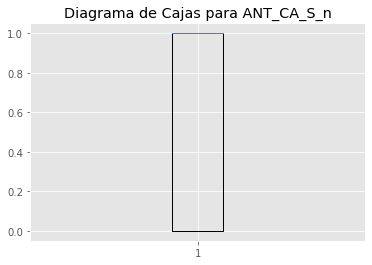

AxesSubplot(0.125,0.125;0.775x0.755)


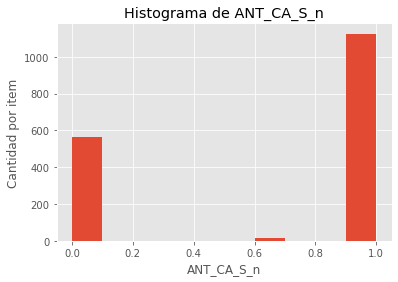

In [45]:
x19=df['ANT_CA_S_n']
by_inf_anam = df.sort_values('ANT_CA_S_n',ascending=True)
x19 = by_inf_anam ['ANT_CA_S_n']
plt.boxplot(x19)
plt.title("Diagrama de Cajas para ANT_CA_S_n")
plt.show()

df19 = df['ANT_CA_S_n']
histogram19 = df19.plot.hist()
print(histogram19)
plt.title('Histograma de ANT_CA_S_n')
plt.xlabel('ANT_CA_S_n')
plt.ylabel('Cantidad por item')
plt.show()

In [46]:

# Analizando zab_leg_02
df_analyzed['zab_leg_02'].describe()

count    1700.000000
mean        0.071471
std         0.257154
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: zab_leg_02, dtype: float64

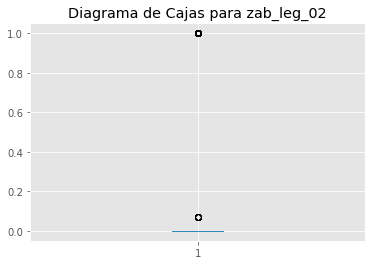

AxesSubplot(0.125,0.125;0.775x0.755)


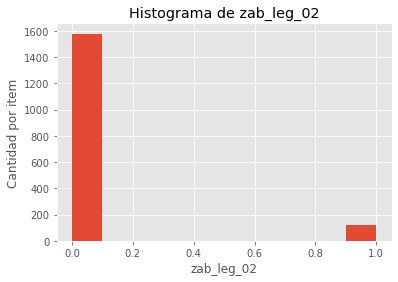

In [47]:
x20=df['zab_leg_02']
by_na_r_1_n = df.sort_values('zab_leg_02',ascending=True)
x20 = by_na_r_1_n ['zab_leg_02']
plt.boxplot(x20)
plt.title("Diagrama de Cajas para zab_leg_02")
plt.show()

df20 = df['zab_leg_02']
histogram20 = df20.plot.hist()
print(histogram20)
plt.title('Histograma de zab_leg_02')
plt.xlabel('zab_leg_02')
plt.ylabel('Cantidad por item')
plt.show()

In [48]:

# Analizando post_im
df_analyzed['post_im'].describe()


count    1700.000000
mean        0.259214
std         0.683881
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: post_im, dtype: float64

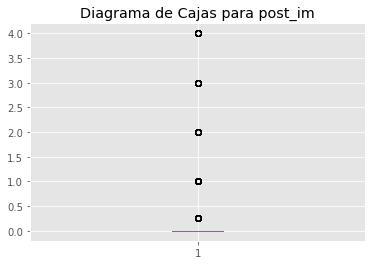

AxesSubplot(0.125,0.125;0.775x0.755)


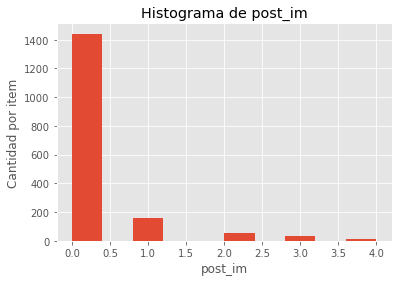

In [49]:
x21=df['post_im']
by_ibs_post = df.sort_values('post_im',ascending=True)
x21 = by_ibs_post ['post_im']
plt.boxplot(x21)
plt.title("Diagrama de Cajas para post_im")
plt.show()

df21 = df['post_im']
histogram21 = df21.plot.hist()
print(histogram21)
plt.title('Histograma de post_im')
plt.xlabel('post_im')
plt.ylabel('Cantidad por item')
plt.show()

In [50]:
# Analizando n_p_ecg_p_12
df_analyzed['n_p_ecg_p_12'].describe()

count    1700.000000
mean        0.049211
std         0.208926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: n_p_ecg_p_12, dtype: float64

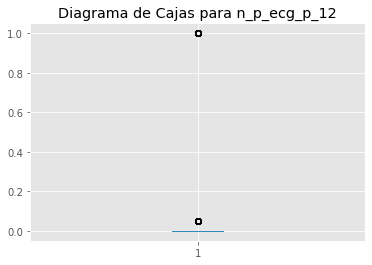

AxesSubplot(0.125,0.125;0.775x0.755)


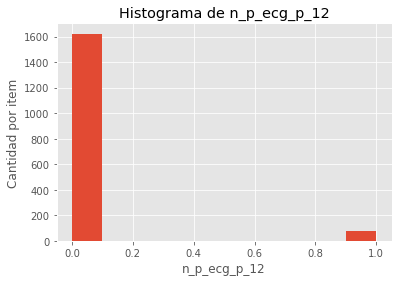

In [51]:
x22=df['n_p_ecg_p_12']
by_na_r_3_n = df.sort_values('n_p_ecg_p_12',ascending=True)
x22 = by_na_r_3_n ['n_p_ecg_p_12']
plt.boxplot(x22)
plt.title("Diagrama de Cajas para n_p_ecg_p_12")
plt.show()

df22 = df['n_p_ecg_p_12']
histogram22 = df22.plot.hist()
print(histogram22)
plt.title('Histograma de n_p_ecg_p_12')
plt.xlabel('n_p_ecg_p_12')
plt.ylabel('Cantidad por item')
plt.show()

In [52]:
# Analizando SEX
df_analyzed['SEX'].describe()

count    1700.000000
mean        0.626471
std         0.483883
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: SEX, dtype: float64

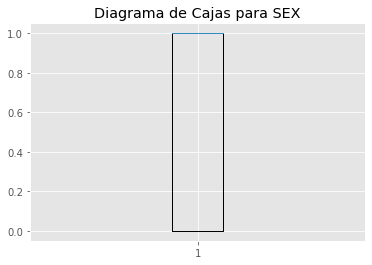

AxesSubplot(0.125,0.125;0.775x0.755)


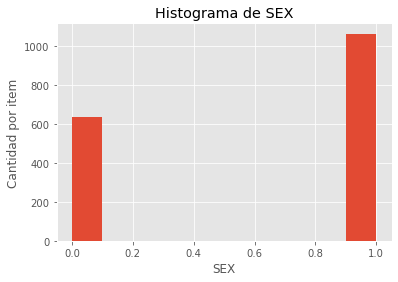

In [53]:
x23=df['SEX']
by_gb = df.sort_values('SEX',ascending=True)
x23 = by_gb ['SEX']
plt.boxplot(x23)
plt.title("Diagrama de Cajas para SEX")
plt.show()

df23 = df['SEX']
histogram23 = df23.plot.hist()
print(histogram23)
plt.title('Histograma de SEX')
plt.xlabel('SEX')
plt.ylabel('Cantidad por item')
plt.show()

In [54]:
# Analizando SVT_POST
df_analyzed['SVT_POST'].describe()

count    1700.000000
mean        0.004739
std         0.068457
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SVT_POST, dtype: float64

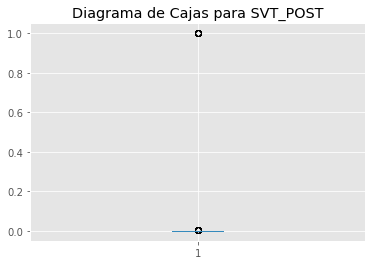

AxesSubplot(0.125,0.125;0.775x0.755)


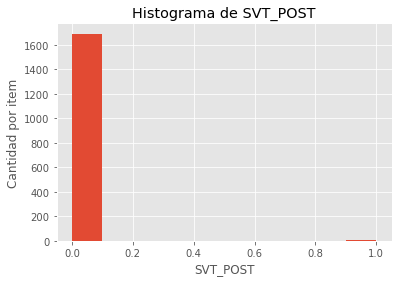

In [55]:
x24=df['SVT_POST']
by_na_kb = df.sort_values('SVT_POST',ascending=True)
x24 = by_na_kb ['SVT_POST']
plt.boxplot(x24)
plt.title("Diagrama de Cajas para SVT_POST")
plt.show()

df24 = df['SVT_POST']
histogram24 = df24.plot.hist()
print(histogram24)
plt.title('Histograma de SVT_POST')
plt.xlabel('SVT_POST')
plt.ylabel('Cantidad por item')
plt.show()

In [56]:
# Analizando GB
df_analyzed['GB'].describe()

count    1700.000000
mean        1.393258
std         1.085916
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: GB, dtype: float64

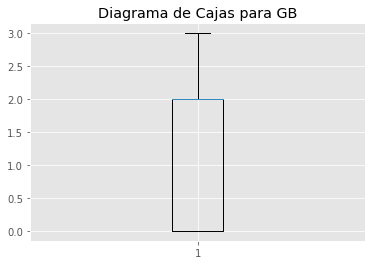

AxesSubplot(0.125,0.125;0.775x0.755)


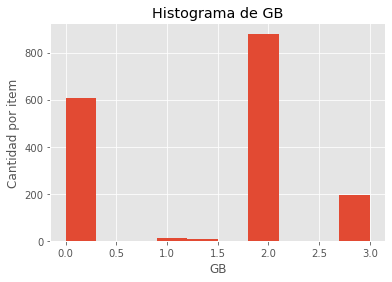

In [57]:
x25=df['GB']
by_lid_s_n = df.sort_values('GB',ascending=True)
x25 = by_lid_s_n ['GB']
plt.boxplot(x25)
plt.title("Diagrama de Cajas para GB")
plt.show()

df25 = df['GB']
histogram25 = df25.plot.hist()
print(histogram25)
plt.title('Histograma de GB')
plt.xlabel('GB')
plt.ylabel('Cantidad por item')
plt.show()

In [58]:
# Analizando nr_11
df_analyzed['nr_11'].describe()

count    1700.000000
mean        0.025015
std         0.155248
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: nr_11, dtype: float64

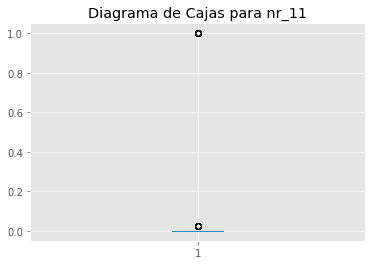

AxesSubplot(0.125,0.125;0.775x0.755)


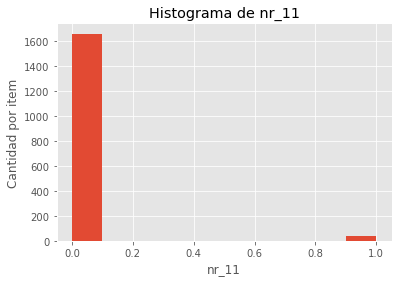

In [59]:
x26=df['nr_11']
by_lid_s_n = df.sort_values('nr_11',ascending=True)
x26 = by_lid_s_n ['nr_11']
plt.boxplot(x26)
plt.title("Diagrama de Cajas para nr_11")
plt.show()

df26 = df['nr_11']
histogram26 = df26.plot.hist()
print(histogram26)
plt.title('Histograma de nr_11')
plt.xlabel('nr_11')
plt.ylabel('Cantidad por item')
plt.show()

In [60]:
# Analizando ZSN_A
df_analyzed['ZSN_A'].describe()

count    1700.000000
mean        0.194411
std         0.648169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: ZSN_A, dtype: float64

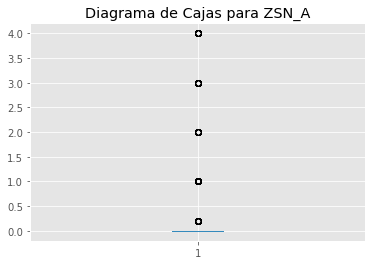

AxesSubplot(0.125,0.125;0.775x0.755)


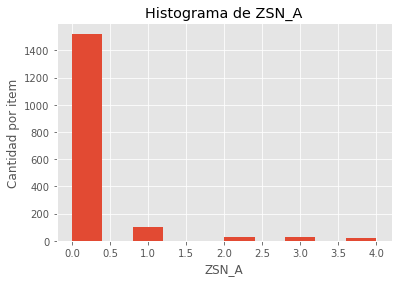

In [61]:
x27=df['ZSN_A']
by_lid_s_n = df.sort_values('ZSN_A',ascending=True)
x27 = by_lid_s_n ['ZSN_A']
plt.boxplot(x27)
plt.title("Diagrama de Cajas para ZSN_A")
plt.show()

df27 = df['ZSN_A']
histogram27 = df27.plot.hist()
print(histogram27)
plt.title('Histograma de ZSN_A')
plt.xlabel('ZSN_A')
plt.ylabel('Cantidad por item')
plt.show()

In [62]:
# Analizando FK_STENOK
df_analyzed['FK_STENOK'].describe()

count    1700.000000
mean        1.205286
std         1.018208
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FK_STENOK, dtype: float64

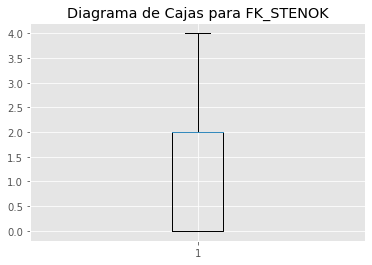

AxesSubplot(0.125,0.125;0.775x0.755)


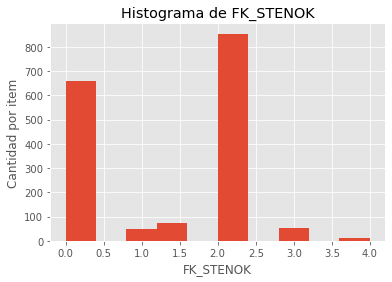

In [63]:
x28=df['FK_STENOK']
by_lid_s_n = df.sort_values('FK_STENOK',ascending=True)
x27 = by_lid_s_n ['FK_STENOK']
plt.boxplot(x28)
plt.title("Diagrama de Cajas para FK_STENOK")
plt.show()

df28 = df['FK_STENOK']
histogram28 = df28.plot.hist()
print(histogram28)
plt.title('Histograma de FK_STENOK')
plt.xlabel('FK_STENOK')
plt.ylabel('Cantidad por item')
plt.show()

In [64]:
# Analizando ritm_ecg_p_01
df_analyzed['ritm_ecg_p_01'].describe()

count    1700.000000
mean        0.664729
std         0.450619
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ritm_ecg_p_01, dtype: float64

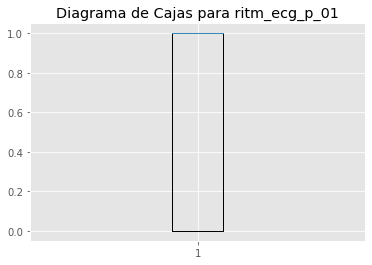

AxesSubplot(0.125,0.125;0.775x0.755)


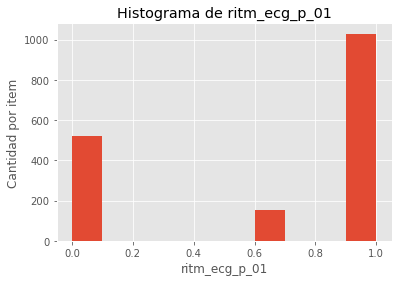

In [65]:
x29=df['ritm_ecg_p_01']
by_lid_s_n = df.sort_values('ritm_ecg_p_01',ascending=True)
x29 = by_lid_s_n ['ritm_ecg_p_01']
plt.boxplot(x29)
plt.title("Diagrama de Cajas para ritm_ecg_p_01")
plt.show()

df29 = df['ritm_ecg_p_01']
histogram29 = df29.plot.hist()
print(histogram29)
plt.title('Histograma de ritm_ecg_p_01')
plt.xlabel('ritm_ecg_p_01')
plt.ylabel('Cantidad por item')
plt.show()

In [66]:
# Analizando IM_PG_P
df_analyzed['IM_PG_P'].describe()

count    1700.000000
mean        0.029429
std         0.169006
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: IM_PG_P, dtype: float64

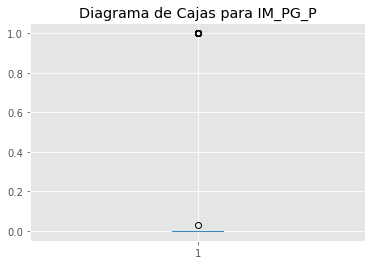

AxesSubplot(0.125,0.125;0.775x0.755)


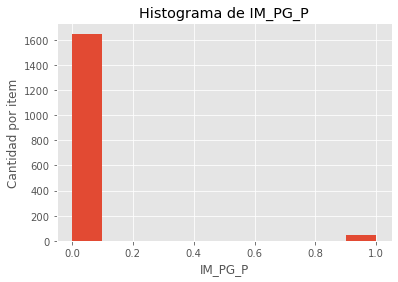

In [68]:
x30=df['IM_PG_P']
by_lid_s_n = df.sort_values('IM_PG_P',ascending=True)
x30 = by_lid_s_n ['IM_PG_P']
plt.boxplot(x30)
plt.title("Diagrama de Cajas para IM_PG_P")
plt.show()

df30 = df['IM_PG_P']
histogram30 = df30.plot.hist()
print(histogram30)
plt.title('Histograma de IM_PG_P')
plt.xlabel('IM_PG_P')
plt.ylabel('Cantidad por item')
plt.show()